In [1]:
import pandas as pd

"""Index column set to be 0th column."""

existing_df = pd.read_csv("Project_Data_1.csv", 
    index_col = 0, 
    thousands  = ',')
existing_df.index.names = ['country']
existing_df.columns.names = ['year']

"""Using PCA to reduce 18 variables into just two"""

In [3]:
existing_df.head()

year            1990  1991  1992  1993  1994  1995  1996  1997  1998  1999  \
country                                                                      
Afghanistan      436   429   422   415   407   397   397   387   374   373   
Albania           42    40    41    42    42    43    42    44    43    42   
Algeria           45    44    44    43    43    42    43    44    45    46   
American Samoa    42    14     4    18    17    22     0    25    12     8   
Andorra           39    37    35    33    32    30    28    23    24    22   

year            2000  2001  2002  2003  2004  2005  2006  2007  
country                                                         
Afghanistan      346   326   304   308   283   267   251   238  
Albania           40    34    32    32    29    29    26    22  
Algeria           48    49    50    51    52    53    55    56  
American Samoa     8     6     5     6     9    11     9     5  
Andorra           20    20    21    18    19    18    17    19

In [4]:
from sklearn.decomposition import PCA
    
pca = PCA(n_components=2)
pca.fit(existing_df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

"""Calling transform method."""

In [5]:
existing_2d = pca.transform(existing_df)

"""As a result of this we end up with a lower dimension representation of our 
dataframe, as a numPy array. Let's put it in a new data frame."""

In [6]:
existing_df_2d = pd.DataFrame(existing_2d)
existing_df_2d.index = existing_df.index
existing_df_2d.columns = ['PC1','PC2']
existing_df_2d.head()

PC1         PC2
country                               
Afghanistan     732.215864  203.381494
Albania        -613.296510    4.715978
Algeria        -569.303713  -36.837051
American Samoa -717.082766    5.464696
Andorra        -661.802241   11.037736

"""We can also print the explained variance ratio as follows."""

In [7]:
print(pca.explained_variance_ratio_) 

[ 0.91808789  0.060556  ]


"""Using MatPlot"""

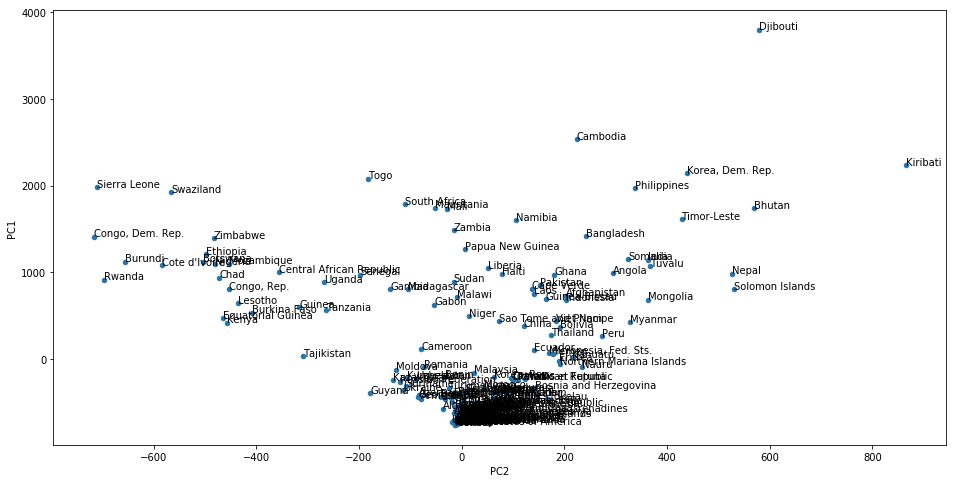

In [8]:
%matplotlib inline
    
ax = existing_df_2d.plot(kind='scatter', x='PC2', y='PC1', figsize=(16,8))
    
for i, country in enumerate(existing_df.index):
    ax.annotate(
        country, 
        (existing_df_2d.iloc[i].PC2, existing_df_2d.iloc[i].PC1)
    )

"""creating Bubble chart"""

In [10]:
from sklearn.preprocessing import normalize
    
existing_df_2d['country_mean'] = pd.Series(existing_df.mean(axis=1),index=existing_df_2d.index)
country_mean_max = existing_df_2d['country_mean'].max()
country_mean_min = existing_df_2d['country_mean'].min()
country_mean_scaled = (existing_df_2d.country_mean-country_mean_min) / country_mean_max
existing_df_2d['country_mean_scaled'] = pd.Series(country_mean_scaled,index=existing_df_2d.index) 
existing_df_2d.head()

PC1         PC2  country_mean  country_mean_scaled
country                                                                  
Afghanistan     732.215864  203.381494    353.333333             0.329731
Albania        -613.296510    4.715978     36.944444             0.032420
Algeria        -569.303713  -36.837051     47.388889             0.042234
American Samoa -717.082766    5.464696     12.277778             0.009240
Andorra        -661.802241   11.037736     25.277778             0.021457

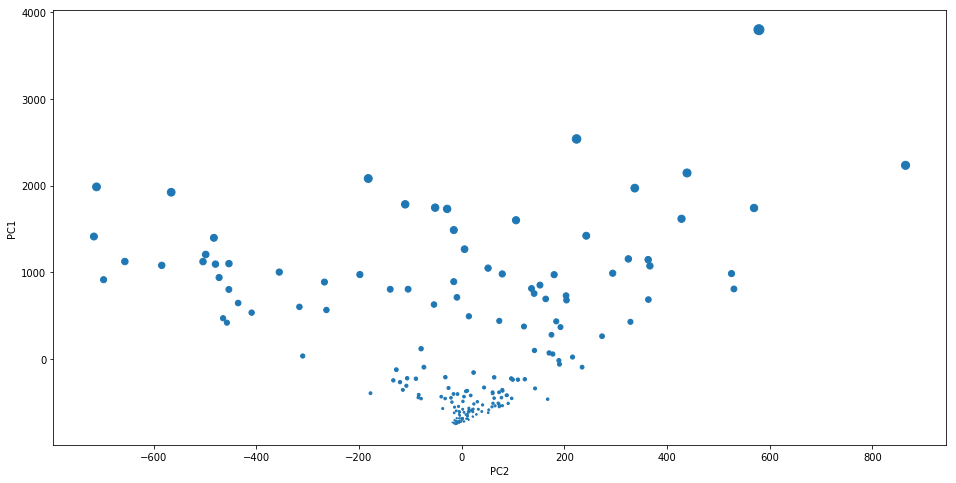

In [11]:
existing_df_2d.plot(
    kind='scatter', 
    x='PC2', 
    y='PC1', 
    s=existing_df_2d['country_mean_scaled']*100, 
    figsize=(16,8))

"""Summing Up"""

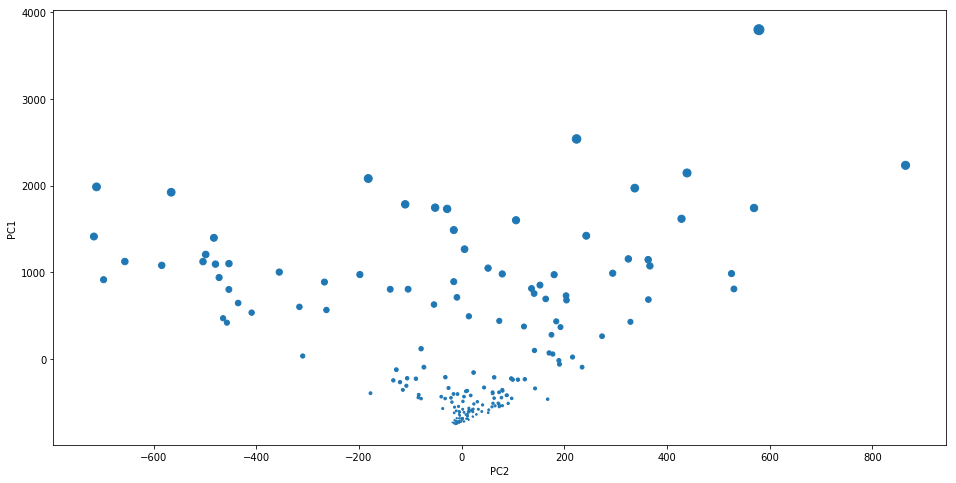

In [12]:
existing_df_2d['country_sum'] = pd.Series(
    existing_df.sum(axis=1), 
    index=existing_df_2d.index)
country_sum_max = existing_df_2d['country_sum'].max()
country_sum_min = existing_df_2d['country_sum'].min()
country_sum_scaled =(existing_df_2d.country_sum-country_sum_min)/country_sum_max
existing_df_2d['country_sum_scaled'] = pd.Series(
        country_sum_scaled, 
        index=existing_df_2d.index)
existing_df_2d.plot(
    kind='scatter', 
    x='PC2', y='PC1', 
    s=existing_df_2d['country_sum_scaled']*100, 
    figsize=(16,8))

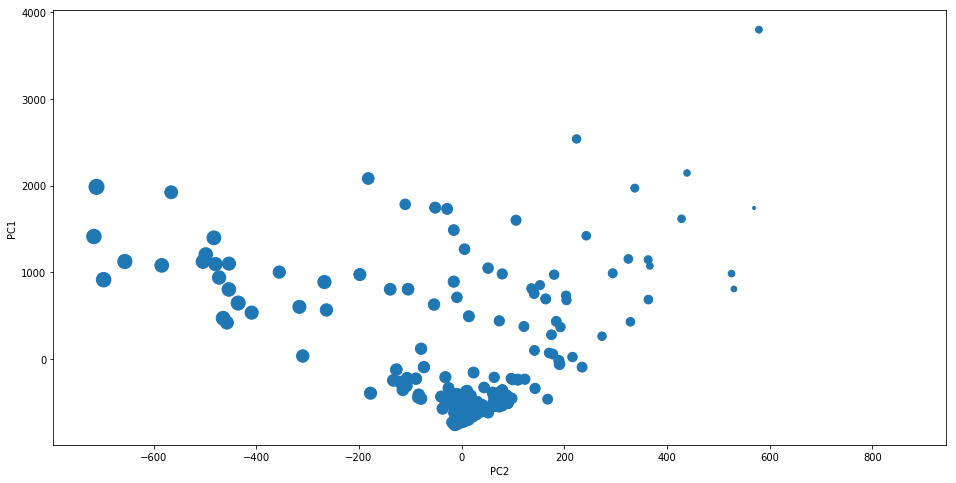

In [13]:
existing_df_2d['country_change'] = pd.Series(
    existing_df['2007']-existing_df['1990'], 
    index=existing_df_2d.index)
country_change_max = existing_df_2d['country_change'].max()
country_change_min = existing_df_2d['country_change'].min()
country_change_scaled = (existing_df_2d.country_change - country_change_min) / country_change_max
existing_df_2d['country_change_scaled'] = pd.Series(
        country_change_scaled, 
        index=existing_df_2d.index)
existing_df_2d[['country_change','country_change_scaled']].head()

existing_df_2d.plot(
    kind='scatter', 
    x='PC2', y='PC1', 
    s=existing_df_2d['country_change_scaled']*100, 
    figsize=(16,8))

"""Year over year analysis using clustering(K mean)"""

In [14]:
from sklearn.cluster import KMeans
    
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit(existing_df)


In [15]:
existing_df_2d['cluster']=pd.Series(clusters.labels_, index=existing_df_2d.index)

"""And now we are ready to plot, using the cluster column as color."""

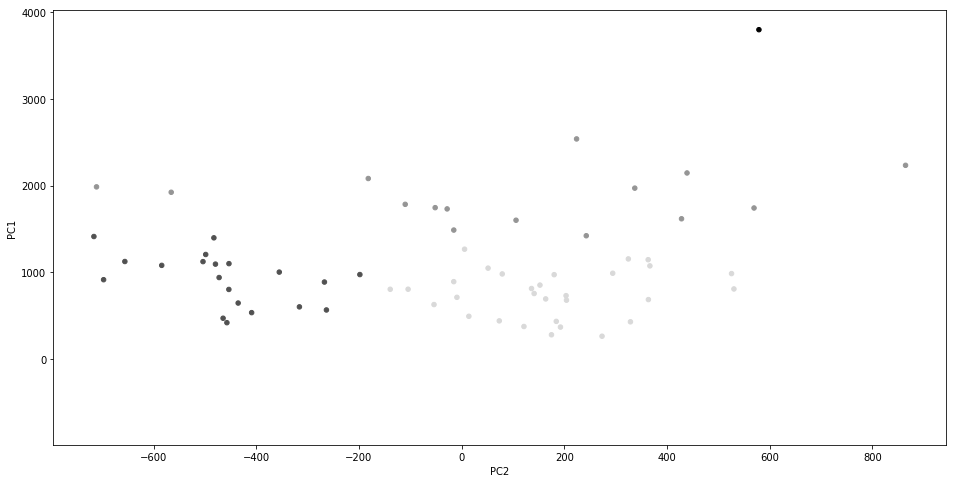

In [16]:
import numpy as np
    
existing_df_2d.plot(
        kind='scatter',
        x='PC2',y='PC1',
        c=existing_df_2d.cluster.astype(np.float), 
        figsize=(16,8))

"""Puuting back the cluster number in the data frame for each country and identify which needs to be grouped together."""